Carlos Garcia - 21000475

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

### Obtención de datos

In [2]:
data = np.load('./input/proyecto_training_data.npy')
data = pd.DataFrame(data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
data.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### Análisis

In [3]:
results = np.zeros((3, 3))
for i in range(1,4):
    poly = PolynomialFeatures(i)
    for f in range(2,5):
        dim = poly.fit_transform(data.iloc[:,1:f]).shape[1]
        results[i-1, f-2] = dim

In [4]:
comparative_df = pd.DataFrame(data = results, columns = ['1_Feature', '2_Features', '3_Features'], index = ['Grado_1', 'Grado_2', 'Grado_3'])
comparative_df

,1_Feature,2_Features,3_Features
Grado_1,2.0,3.0,4.0
Grado_2,3.0,6.0,10.0
Grado_3,4.0,10.0,20.0


Text(0, 0.5, 'Número de Dimensiones')

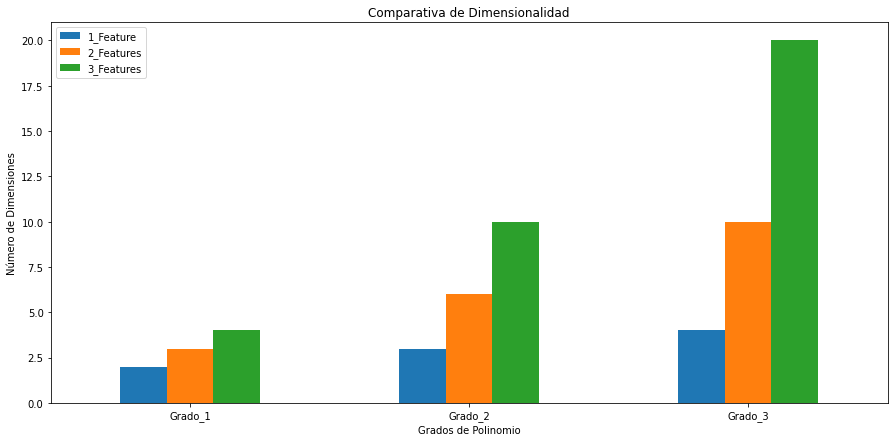

In [5]:
comparative_df.plot(kind="bar", figsize = (15,7), rot=0)
plt.title("Comparativa de Dimensionalidad")
plt.xlabel("Grados de Polinomio")
plt.ylabel("Número de Dimensiones")

### Conclusiones

- Como indica la "Maldición de la dimensionalidad" al incrementar el grado de polinomio es posible observar un incremento, similar a una tendencia exponencial, en el número de combinaciones posibles entre las variables de entrada
- El incrementar un feature a partir de una transformación polinómica de grado 2 implica un crecimiento de aproximadamente el doble con la variable interior, hasta asemejar un crecimiento exponencial
- Aunque las transformaciones polinómicas son útiles, el no considerar el crecimiento de dimensionalidad de los datos de entrada puede implicar una complejidad computacional mayor para el algoritmo a evaluar